In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 22
case = 1

# Init
A = np.zeros((n-2, n-2))
B = np.zeros(n-2)
H = np.zeros(n+1)

dataX = []
dataY = []

f = open("DataSheet.in", "r")
for line in f:
    cut = line.replace("\n", "").split()
    dataX.append(float(cut[ 0 ]))
    dataY.append(float(cut[ 1 ]))
    
print(dataX)
print(dataY)

[1.3746, 2.921, 5.3265, 8.7629, 10.6529, 16.1512, 19.9313, 26.2887, 31.2715, 34.0206, 38.488, 43.299, 46.5636, 47.5945, 51.89, 61.8557, 64.9485, 72.6804, 79.3815, 84.7079, 93.9863, 97.2509]
[24.9141, 23.3677, 21.9931, 21.3058, 21.6495, 23.3677, 26.6323, 27.6632, 25.4296, 24.2268, 23.0241, 24.055, 25.4296, 29.7251, 39.3471, 39.8626, 37.8007, 33.5052, 33.1615, 33.5052, 37.2852, 41.0653]


In [9]:
for i in range(n-1):
    H[ i ] = dataX[ i+1 ] - dataX[ i ]

if case == 1:
    A[ 0 ][ 0 ] = 2 * (H[ 0 ] + H[ 1 ])
    A[ 0 ][ 1 ] = H[ 1 ]
    A[ n-3 ][ n-4 ] = H[ n-3 ]
    A[ n-3 ][ n-3 ] = 2 * (H[ n-3 ] + H[ n-2 ])

elif case == 2:
    A[ 0 ][ 0 ] = 3 * H[ 0 ] + 2 * H[ 1 ]
    A[ 0 ][ 1 ] = H[ 1 ]
    A[ n-3 ][ n-4 ] = H[ n-3 ]
    A[ n-3 ][ n-3 ] = 2 * H[ n-3 ] + 3 * H[ n-2 ]
else:
    A[ 0 ][ 0 ] = (H[0]+H[1])*(H[0]+2*H[1])/H[1]
    A[ 0 ][ 1 ] = (H[1]**2-H[0]**2)/H[1]
    A[ n-3 ][ n-4 ] = (H[n-3]**2-H[n-2]**2)/H[n-3]
    A[ n-3 ][ n-3 ] = (H[n-2]+H[n-3])*(H[n-2]+2*H[n-3])/H[n-3]
    
for i in range(1, n-3):
    A[ i ][ i-1 ] = H[ i ]
    A[ i ][ i ] = 2 * (H[ i ] + H[ i+1 ])
    A[ i ][ i+1 ] = H[ i+1 ]

print(A)
print("\n")

for i in range(n-2):
    u = (dataY[ i+2 ] - dataY[ i+1 ]) / H[ i+1 ]
    d = (dataY[ i+1 ] - dataY[ i ]) / H[ i ]
    B[ i ] = 6 * (u - d)

print(B)

[[ 7.9038  2.4055  0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 2.4055 11.6838  3.4364  0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      3.4364 10.6528  1.89    0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      1.89   14.7766  5.4983  0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      5.4983 18.5568  3.7801  0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      3.7801 20.275   6.3574  0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      6.3

In [5]:
S = np.linalg.solve(A, B)
print("Origin S = ")
print(S)


if case == 1:
    S = np.insert(S, 0, 0)
    S = np.append(S, 0)

elif case == 2:
    S = np.insert(S, 0, S[ 0 ])
    S = np.append(S, S[-1])
else:
    t1 = ((H[0]+H[1])*S[0]-H[0]*S[1])/H[1]
    t2 = ((H[n-3]+H[n-2])*S[-1]-H[n-2]*S[-2])/H[n-3]
    S = np.insert(S, 0, t1)
    S = np.append(S, t2)
    
print("New S = ")
print(S)

Origin S = 
[ 0.30465781  0.06792886  0.20430863 -0.06282733  0.24118353 -0.21781512
 -0.11078728  0.04714632 -0.04096189  0.32937305 -0.62941925  3.00862513
 -1.2786742  -0.24223127 -0.07306912  0.00385447  0.1046667  -0.00380811
  0.01598234  0.17359319]
New S = 
[ 0.          0.30465781  0.06792886  0.20430863 -0.06282733  0.24118353
 -0.21781512 -0.11078728  0.04714632 -0.04096189  0.32937305 -0.62941925
  3.00862513 -1.2786742  -0.24223127 -0.07306912  0.00385447  0.1046667
 -0.00380811  0.01598234  0.17359319  0.        ]


In [6]:
ai = np.zeros(n-1)
bi = np.zeros(n-1)
ci = np.zeros(n-1)
di = np.zeros(n-1)

for i in range(n-1):
    ai[ i ] = (S[ i+1 ] - S[ i ]) / (6 * H[ i ])
    bi[ i ] = S[ i ] / 2
    ci[ i ] = (float(dataY[ i+1 ]) - float(dataY[ i ])) / H[ i ] - (2 * H[ i ] * S[ i ] + H[ i ] * S[ i+1 ]) / 6
    di[ i ] = float(dataY[ i ])
    
print(ai[7], bi[7], ci[7], di[7])

0.005282625738508074 -0.05539364147550918 -0.3034051792569654 27.6632


In [7]:
# P3(x)i = ai(x-xi)^3 + bi(x-xi)^2 + ci(x-xi) + di
def Poly(x, i):
    return ai[i]*(x-dataX[i])**3+bi[i]*(x-dataX[i])**2+ci[i]*(x-dataX[i])+di[i]
        

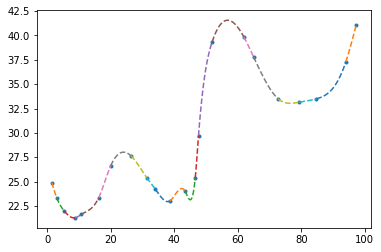

In [8]:
plt.plot(dataX, dataY, '.')

# Print every poly in data interval  
for i in range(n-1):
    d = np.linspace(dataX[ i ], dataX[ i+1 ], 100)
    plt.plot(d, Poly(d, i), '--')
    
plt.show()